# LDA e QDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Weekly.csv') 

In [3]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


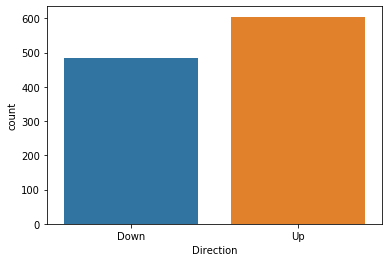

In [5]:
x = data['Direction']
ax = sns.countplot(x=x, data=data)

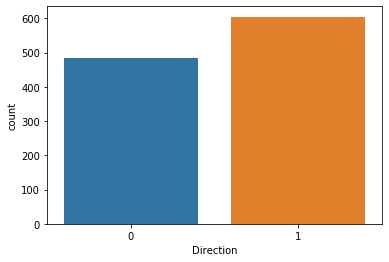

In [6]:
le = LabelEncoder()  
data['Direction'] = le.fit_transform(data['Direction'])
x = data['Direction']
ax = sns.countplot(x=x, data=data)

In [7]:
for col in data.columns:
    print("{} : {}".format(col, data[col].isnull().sum()))

Year : 0
Lag1 : 0
Lag2 : 0
Lag3 : 0
Lag4 : 0
Lag5 : 0
Volume : 0
Today : 0
Direction : 0


In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### LDA

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_prob_lda = lda.predict_proba(X_test)[:, 1]

#y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0) # Precisa usar enconder pois a classe direction não está 1 e 0 
y_pred_lda = lda.predict(X_test)

print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

[[ 78   4]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        82
           1       0.97      0.99      0.98       136

    accuracy                           0.98       218
   macro avg       0.98      0.97      0.98       218
weighted avg       0.98      0.98      0.98       218



#### QDA

In [12]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_qda = qda.predict(X_test)

print(confusion_matrix(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))

[[ 78   4]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        82
           1       0.97      0.99      0.98       136

    accuracy                           0.98       218
   macro avg       0.98      0.97      0.98       218
weighted avg       0.98      0.98      0.98       218



#### LDA como redutor de dimensão

In [13]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

Assim, é possível utilizar X_lda no lugar de X e aplicar outros algoritmos de classificação